In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import time
import matplotlib 
matplotlib.rc_file_defaults()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
params = {'xtick.labelsize': 10, 'ytick.labelsize': 10}
matplotlib.rcParams.update(params)
import datetime
pd.set_option('display.max_columns', None)

## Cuarto Plot

In [2]:
file_stats = "SQMStats_Pangamos_20210830-20220203v3.xlsx"
df = pd.read_excel(file_stats)
df_mop = df[(df["Producto"].notna()) & (df["Producto"].str.contains("MOP")) 
            & df["Hora Ingreso a Puerto"].notna() & df["Hora Legada a Espera"].notna()]
df_mop.shape

(3218, 32)

In [3]:
cols = df_mop.columns
cols = cols[~cols.str.contains("Unnamed")]
df_mop = df_mop[cols]

In [4]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking]


In [5]:
df_mop["Semana del Año"] = pd.to_datetime(df_mop["Hora Ingreso a Puerto"]).dt.isocalendar().week

In [6]:
mop_sem = df_mop.groupby("Semana del Año").mean()
mop_sem

,Tiempo Espera [minutos],Tiempo Total en Puerto,Tiempo total Descarga
Semana del Año,,,
3,71.859350,58.150244,46.763740
4,104.151334,53.367176,43.666691
5,179.095722,86.229144,73.193405
35,94.113025,62.338259,19.358567
36,27.669298,83.534649,63.894834
38,85.948079,80.090036,69.636953
39,74.301922,93.002080,76.574829
40,74.068398,201.540043,168.308225


In [7]:
mop_sem.loc[3][1]

58.15024390244193

In [8]:
semana = [i for i in range(35, 53)] + [i for i in range(1, 6)]
idx_sem = [i for i in range(len(semana))]

In [9]:
T_sem = []
for i in semana:
    if i in mop_sem.index:
        T_sem.append(mop_sem.loc[i][1])
    else:
        T_sem.append(0.)
        
        
T_sem = np.array(T_sem)
T_semana = []
for i in T_sem:
    if i != 0.:
        T_semana.append(i)
T_semana = np.array(T_semana)
T_semana

array([ 62.33825864,  83.53464912,  80.09003575,  93.00208004,
       201.54004329,  58.1502439 ,  53.36717613,  86.22914439])

In [10]:
T_sem

array([ 62.33825864,  83.53464912,   0.        ,  80.09003575,
        93.00208004, 201.54004329,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        58.1502439 ,  53.36717613,  86.22914439])

In [11]:
idx_sem_t = []
for i in range(len(semana)):
    if T_sem[i] != 0:
        idx_sem_t.append(i)
        
idx_sem_t

[0, 1, 3, 4, 5, 20, 21, 22]

In [12]:
T_sem

array([ 62.33825864,  83.53464912,   0.        ,  80.09003575,
        93.00208004, 201.54004329,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        58.1502439 ,  53.36717613,  86.22914439])

In [13]:
N_trucks = []

for i in semana:
    if i in mop_sem.index:
        N_trucks.append(df_mop[df_mop["Semana del Año"] == i].shape[0])
    else:
        N_trucks.append(0.)

N_trucks = np.array(N_trucks)
N_trucks

array([714., 342.,   0., 373., 633.,  77.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 205., 687.,
       187.])

In [14]:
xtick = ["21-"+ str(i) for i in range(35, 53)] + ["22-"+ str(i) for i in range(1, 6)]
NTrucks = []
for i in N_trucks:
    if i != 0:
        NTrucks.append(i)
        
NTrucks = np.array(NTrucks)
NTrucks

array([714., 342., 373., 633.,  77., 205., 687., 187.])

In [15]:
pond = (T_sem*N_trucks).sum()/N_trucks.sum()
pond

75.21744872591749

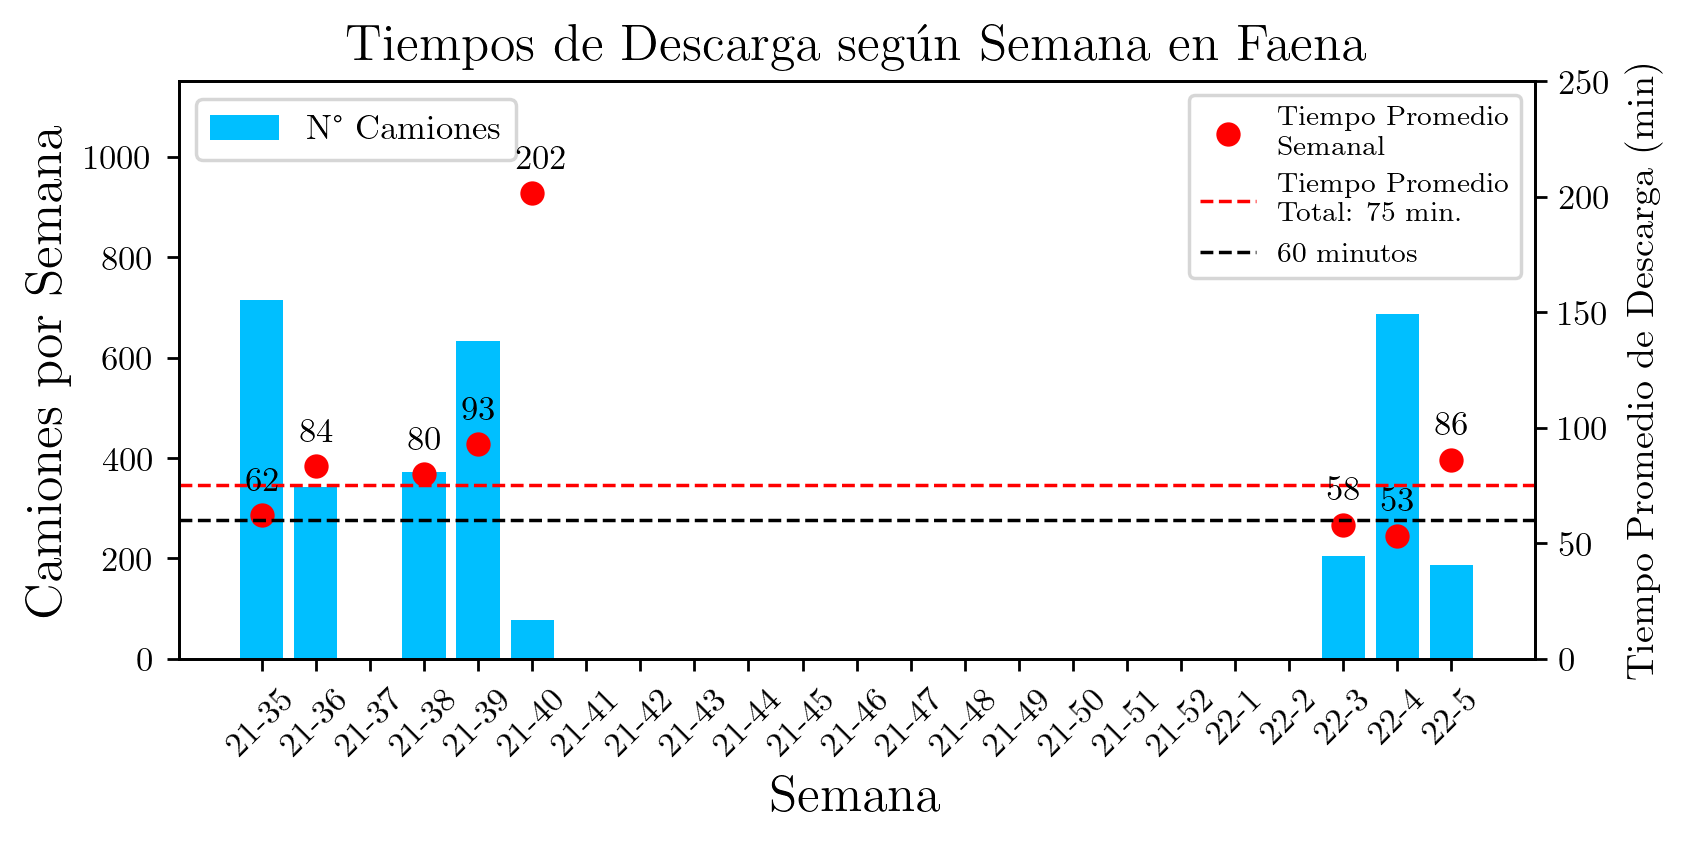

In [16]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax1 = fig.add_subplot(111)

ax1.set_ylabel("Camiones por Semana", fontsize = 15)
ax1.bar(idx_sem, N_trucks, label = "N° Camiones", color = "deepskyblue")
#ax1.axhline(y = NTrucks.mean(), c = "k", 
                #linestyle = "--", linewidth = 1, 
            #label = "N° Promedio de \n Camiones" )
ax1.set_ylim([0,1150])
ax1.set_xlabel("Semana", fontsize = 15)
ax1.legend(loc = "upper left")
ax1.set_xticks(idx_sem)
ax1.set_xticklabels(xtick, fontsize=10, rotation = 45, fontdict = {"horizontalalignment": "center"})


ax2 = ax1.twinx() 

ax2.plot(idx_sem_t, T_semana, "ro", label = "Tiempo Promedio \n Semanal")
ax2.set_title("Tiempos de Descarga según Semana en Faena", fontsize = 15)
ax2.set_ylabel("Tiempo Promedio de Descarga (min)", fontsize = 11)
ax2.axhline(y = pond, c = "r", 
                linestyle = "--", linewidth = 1, 
            label = "Tiempo Promedio \n Total: "+ str(round(pond)) + " min.")
ax2.axhline(y = 60., c = "k", 
                linestyle = "--", linewidth = 1, label = "60 minutos")
ax2.set_ylim([0,250])
ax2.legend(fontsize = 8)


for i, label in enumerate(T_sem):
    if label != 0.:
        plt.annotate(str(round(label)), (i-0.3, T_sem[i]+10.7))


plt.savefig("Graficos/Tiempos de Descarga por Semana.png", bbox_inches= "tight") 

In [17]:
T_semana

array([ 62.33825864,  83.53464912,  80.09003575,  93.00208004,
       201.54004329,  58.1502439 ,  53.36717613,  86.22914439])

## Quinto plot

In [18]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Semana del Año
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,20210830 19:44:12,752.233333,20210831 08:29:21,98.133333,11.116667,[uDeposito,uStacking],35


In [19]:
df_mop["Hora Ingreso a Puerto"] = pd.to_datetime(df_mop["Hora Ingreso a Puerto"])
df_mop["Hora Legada a Espera"] = pd.to_datetime(df_mop["Hora Legada a Espera"])

In [20]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Semana del Año
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],35


In [21]:
def Rango_Hora(t):
    return str(t.hour)+"-"+str(t.hour+1)

In [22]:
df_mop["Rango de Hora en Puerto"] = df_mop["Hora Ingreso a Puerto"].apply(lambda x: Rango_Hora(x.time()))

In [23]:
rango_hrs = df_mop["Rango de Hora en Puerto"].unique()
rango_hrs

array(['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
       '15-16', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24',
       '0-1', '16-17', '17-18', '7-8'], dtype=object)

In [24]:
N_cam = []
for i in rango_hrs:
    N_cam.append(df_mop["Rango de Hora en Puerto"][df_mop["Rango de Hora en Puerto"] == i].shape[0])

In [25]:
N_cam = np.array(N_cam)
N_cam

array([151, 388, 230, 204, 209, 201, 215, 128, 194, 203, 214, 211,  22,
       129,  25, 286, 207,   1])

In [26]:
df_mop.groupby("Rango de Hora en Puerto").mean()

,Tiempo Espera [minutos],Tiempo Total en Puerto,Tiempo total Descarga,Semana del Año
Rango de Hora en Puerto,,,,
0-1,33.545333,107.328000,46.904667,17.040000
10-11,130.440290,81.531522,51.898913,25.013043
11-12,103.342239,67.251961,48.993873,26.269608
12-13,47.004545,68.448565,49.683493,26.119617
13-14,30.327363,85.612935,72.220315,28.800995
14-15,20.317519,78.989612,66.594419,26.144186
15-16,29.306901,77.499870,57.306641,26.132812
16-17,28.147552,71.043182,58.454312,28.216783
17-18,19.938406,63.204992,52.297907,27.555556


In [27]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Semana del Año,Rango de Hora en Puerto
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],35,8-9


In [28]:
df_mop["Fecha en Puerto"] = df_mop["Hora Ingreso a Puerto"].apply(lambda x: x.date())

In [29]:
fechas = df_mop["Fecha en Puerto"].unique()
rangos = df_mop["Rango de Hora en Puerto"].unique()

In [30]:
#for i in range
cam_prom = [[] for i in range(len(rangos))]
for i in range(len(rangos)):
    for j in range(len(fechas)):
        cam_prom[i].append(df_mop[(df_mop["Rango de Hora en Puerto"] == rangos[i]) & (df_mop["Fecha en Puerto"] == fechas[j])].shape[0])

In [31]:
mean_trucks = np.array([np.array(i).mean() for i in cam_prom])
mean_trucks

array([ 3.97368421, 10.21052632,  6.05263158,  5.36842105,  5.5       ,
        5.28947368,  5.65789474,  3.36842105,  5.10526316,  5.34210526,
        5.63157895,  5.55263158,  0.57894737,  3.39473684,  0.65789474,
        7.52631579,  5.44736842,  0.02631579])

In [32]:
rangos

array(['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
       '15-16', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24',
       '0-1', '16-17', '17-18', '7-8'], dtype=object)

In [33]:
Rangos = np.array(['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
       '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22', '22-23', '23-24',
       '0-1',  '6-7', '7-8'])

In [34]:
mean_trucks

array([ 3.97368421, 10.21052632,  6.05263158,  5.36842105,  5.5       ,
        5.28947368,  5.65789474,  3.36842105,  5.10526316,  5.34210526,
        5.63157895,  5.55263158,  0.57894737,  3.39473684,  0.65789474,
        7.52631579,  5.44736842,  0.02631579])

In [35]:
Mean_Trucks = np.array([ 5.47368421, 10.47368421,  6.15789474,  5.39473684,  5.5,
        5.31578947,  5.65789474,  3.36842105, 7.55263158,  5.47368421,  5.10526316,  5.34210526,
        5.63157895,  5.60526316,  0.57894737,  3.39473684,  0.65789474,
        0.02631579,  0.02631579])

In [36]:
Mean_Trucks.shape, Rangos.shape

((19,), (19,))

<ipython-input-37-35d376455021>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(Rangos, rotation = 45) #xtick, fontsize=10,


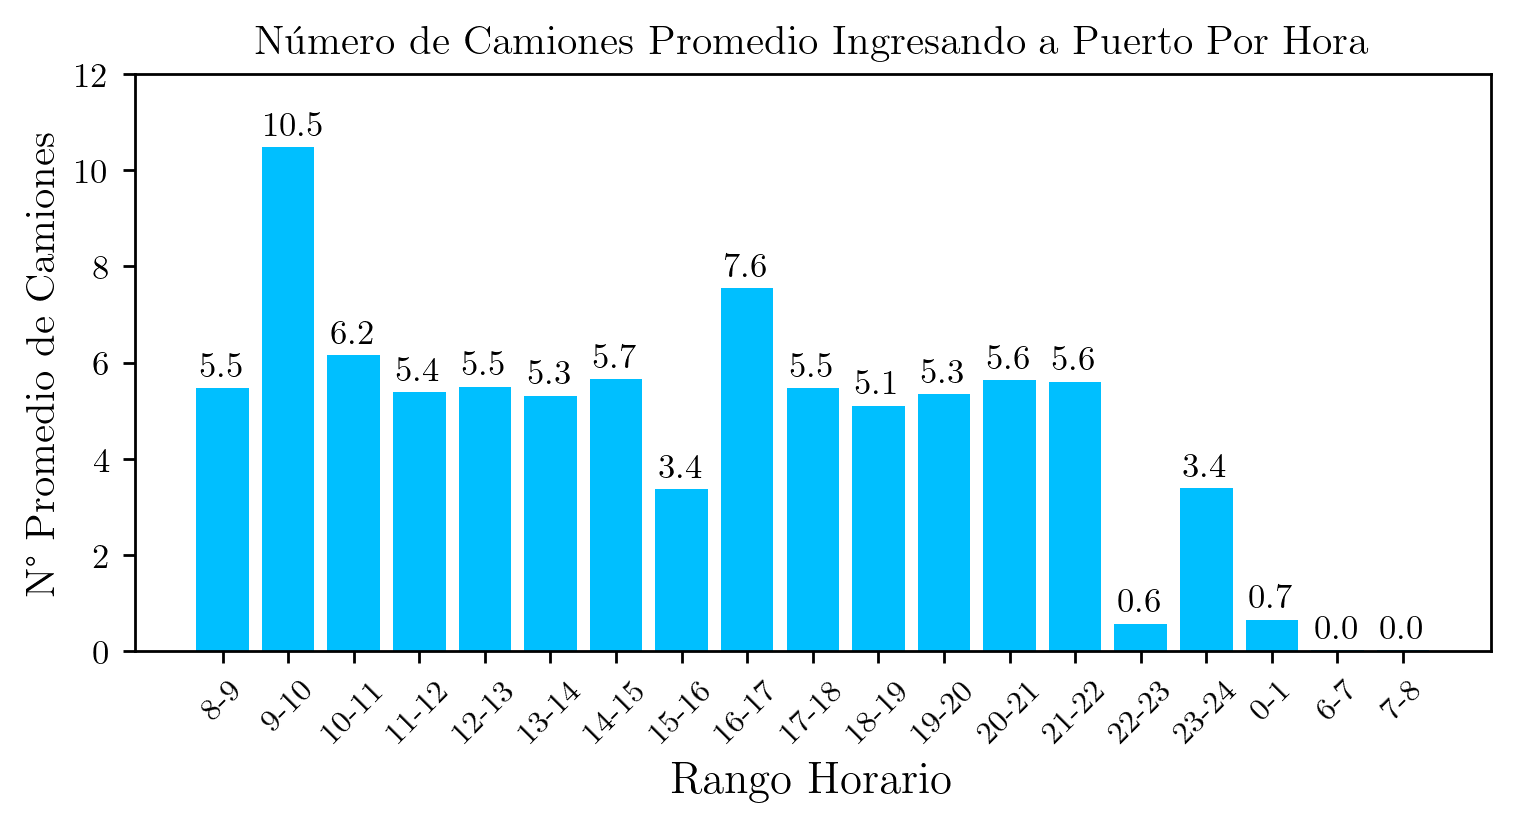

In [37]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(Rangos, Mean_Trucks, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Número de Camiones Promedio Ingresando a Puerto Por Hora", fontsize = 12)
ax2.set_ylabel("N° Promedio de Camiones", fontsize = 12)

#ax2.set_xticks(idx_sem)
ax2.set_xticklabels(Rangos, rotation = 45) #xtick, fontsize=10,
ax2.set_xlabel("Rango Horario", fontsize = 13)
ax2.set_ylim([0,12])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")


for i, label in enumerate(Mean_Trucks):
    if label != 0.:
        plt.annotate(str(round(label,1)), (i-0.35, Mean_Trucks[i]+0.25))

plt.savefig("Graficos/Numero Promedio De Camiones Por Hora.png", bbox_inches= "tight")

## Sexto Plot

In [38]:
Rangos 

array(['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
       '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22',
       '22-23', '23-24', '0-1', '6-7', '7-8'], dtype='<U5')

In [39]:
RANGOS = np.array(['8-9', '9-10', '10-11', '11-12', '12-13', '13-14', '14-15',
       '15-16', '16-17', '17-18', '18-19', '19-20', '20-21', '21-22',
       '22-23', '23-24', '0-1', "2-3", "3-4", "4-5", "5-6", '6-7', '7-8'])

In [40]:
N_camiones = []
for i in RANGOS:
    if i in Rangos:
        N_camiones.append(df_mop[df_mop["Rango de Hora en Puerto"] == i].shape[0])
    else:
        N_camiones.append(0)
N_camiones = np.array(N_camiones)

In [41]:
N_camiones

array([151, 388, 230, 204, 209, 201, 215, 128, 286, 207, 194, 203, 214,
       211,  22, 129,  25,   0,   0,   0,   0,   0,   1])

<ipython-input-42-f2376bb86d22>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(RANGOS, rotation = 45) #xtick, fontsize=10,


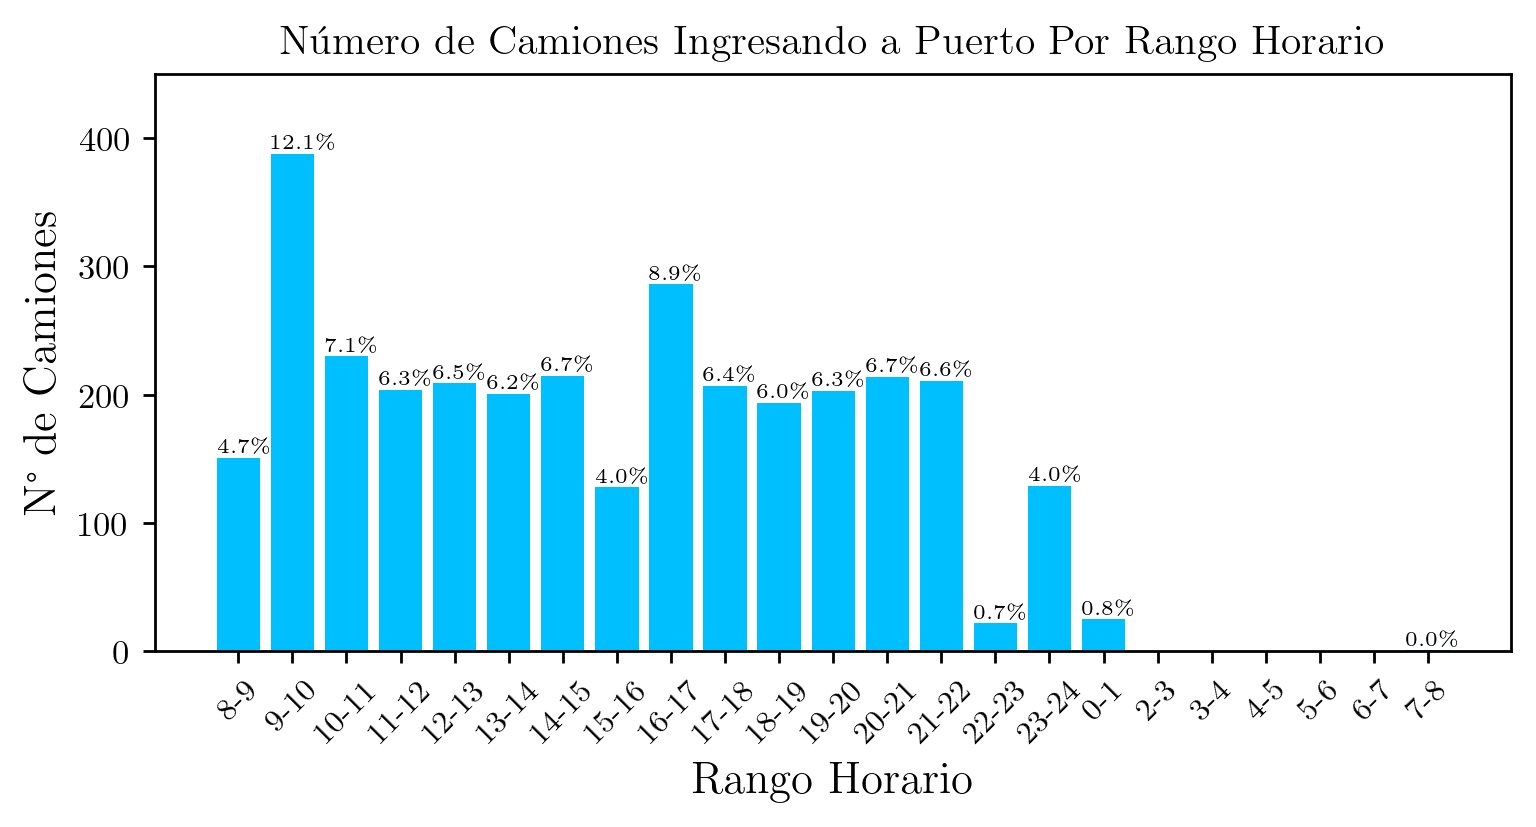

In [42]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(RANGOS, N_camiones, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Número de Camiones Ingresando a Puerto Por Rango Horario", fontsize = 12)
ax2.set_ylabel("N° de Camiones", fontsize = 13)

#ax2.set_xticks(idx_sem)
ax2.set_xticklabels(RANGOS, rotation = 45) #xtick, fontsize=10,
ax2.set_xlabel("Rango Horario", fontsize = 13)
ax2.set_ylim([0,450])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")

perc_camiones = 100*N_camiones/N_camiones.sum()
for i, label in enumerate(perc_camiones):
    if label != 0.:
        plt.annotate(str(round(label,1)) + "\%", (i-0.4, N_camiones[i]+4.25), fontsize = 6)

plt.savefig("Graficos/Numero y Porcentaje De Camiones Por Hora.png", bbox_inches= "tight")

In [43]:
df_mop.tail(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Semana del Año,Rango de Hora en Puerto,Fecha en Puerto
4978,Astudillo,PJCJ12,GPS,169568,20220201 17:49:00,MOP-G R 59,Salar de Atacama-Puerto Angamos,Salar de Atacama,20220201 16:39:36,20220201 16:39:36,Puerto Angamos,20220202 13:28:30,2022-02-02 11:34:33,22.6,2022-02-02 11:57:09,91.35,84.2,[uDescarga KCL,uDescarga KCL,5,11-12,2022-02-02


In [44]:
df_mop["Hora Legada a Espera"] = pd.to_datetime(df_mop["Hora Legada a Espera"])

## Octavo Plot

In [45]:
df_mop.head(1)

,Flota,Patente,Tipo,N Guia,Fecha,Producto,Viaje,Origen,Origen inicio,Origen salida,Destino,Destino termino,Hora Legada a Espera,Tiempo Espera [minutos],Hora Ingreso a Puerto,Tiempo Total en Puerto,Tiempo total Descarga,Nombre Cancha,Nombre Geo Espera Exterior,Semana del Año,Rango de Hora en Puerto,Fecha en Puerto
0,Astudillo,PJCJ50,GPS,124839,20210830 14:32:00,MOP-GR PLUS,Salar de Atacama-Puerto Angamos,Salar de Atacama,20210830 12:35:34,20210830 12:35:34,Puerto Angamos,20210831 10:07:29,2021-08-30 19:44:12,752.233333,2021-08-31 08:29:21,98.133333,11.116667,[uDeposito,uStacking],35,8-9,2021-08-31


In [46]:
def Nocturno(t):
    if t > datetime.time(23,0,0):
        return True
    elif t < datetime.time(8,0,0):
        return True
    else: 
        return False

df_mop["Turno Nocturno"] = df_mop["Hora Legada a Espera"].apply(lambda x: Nocturno(x.time()))

In [47]:
fechas_nocturnas = df_mop["Fecha en Puerto"][df_mop["Turno Nocturno"] == True].unique()

In [48]:
N_noct = []
for i in fechas_nocturnas:
    a = df_mop[(df_mop["Turno Nocturno"] == True) & (df_mop["Fecha en Puerto"] == i)]
    N_noct.append(a.shape[0])
    
N_noct = np.array(N_noct)

In [49]:
fechas_nocturnas = np.array([str(i) for i in fechas_nocturnas])
fechas_nocturnas

array(['2021-08-31', '2021-09-01', '2021-09-02', '2021-09-03',
       '2021-09-04', '2021-09-05', '2021-09-06', '2021-09-07',
       '2021-09-08', '2021-09-23', '2021-09-24', '2021-09-25',
       '2021-09-26', '2021-09-27', '2021-09-28', '2021-09-29',
       '2021-09-30', '2021-10-01', '2021-10-02', '2021-10-03',
       '2021-10-04', '2022-01-17', '2022-01-18', '2022-01-21',
       '2022-01-22', '2022-01-24', '2022-01-25', '2022-01-26',
       '2022-01-27', '2022-01-28', '2022-01-29', '2022-01-30',
       '2022-01-31', '2022-02-01', '2022-02-02'], dtype='<U10')

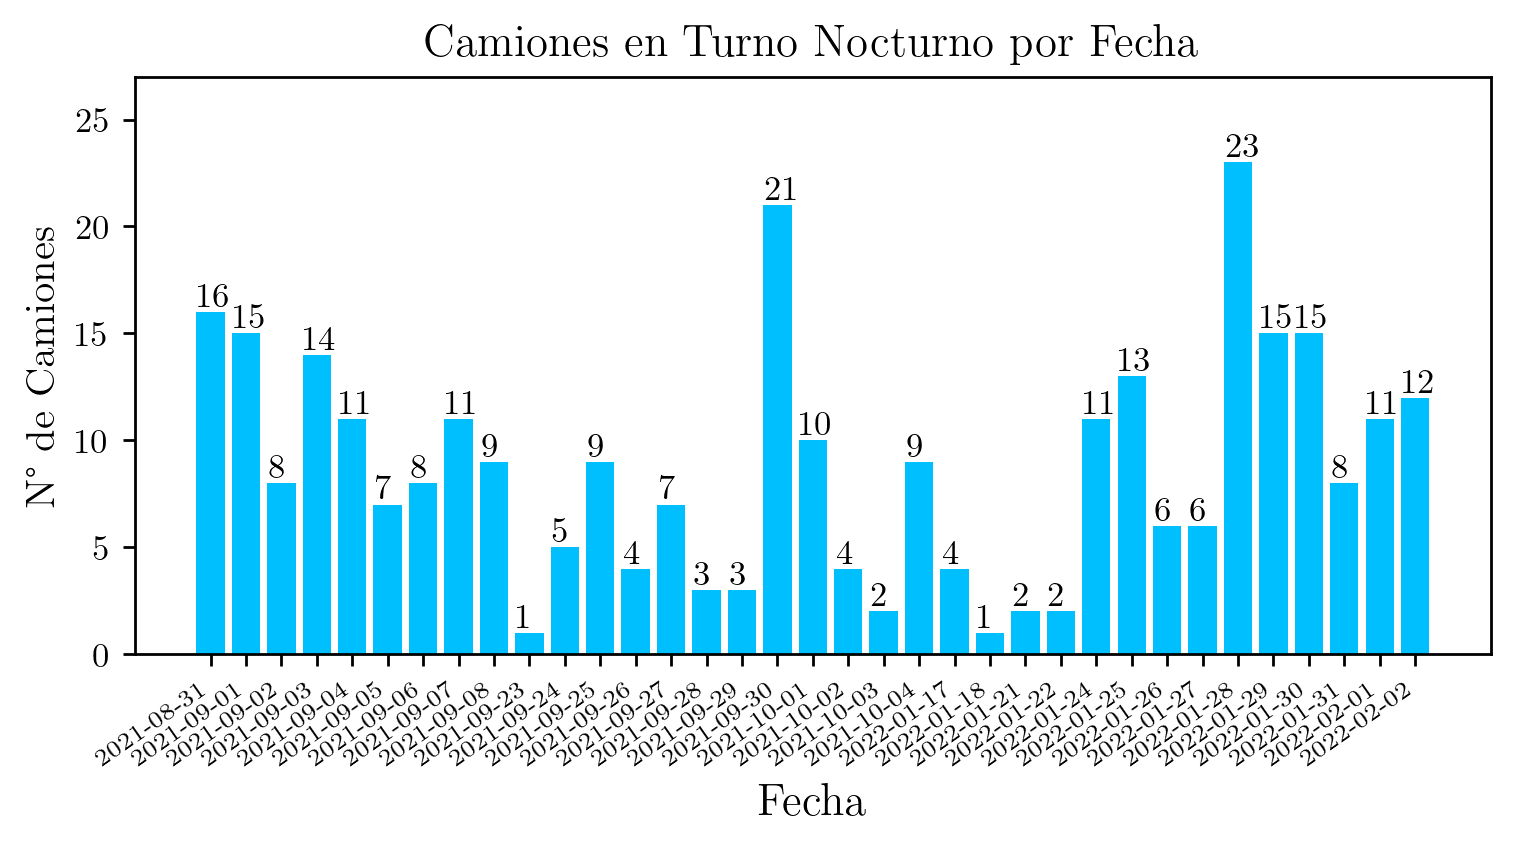

In [50]:
parameters = {'xtick.labelsize': 9, 'ytick.labelsize': 10}
plt.rcParams.update(parameters)
fig = plt.figure(figsize=(7,3), dpi = 250)

ax2 = fig.add_subplot(111)


#ax2.plot(Rangos, Mean_Trucks, "ro", label = "Tiempo Prom.")
ax2.bar(fechas_nocturnas, N_noct, label = "Tiempo Prom.", color = "deepskyblue" )
ax2.set_title("Camiones en Turno Nocturno por Fecha", fontsize = 13)
ax2.set_ylabel("N° de Camiones", fontsize = 12)

ax2.set_xticks(fechas_nocturnas)
ax2.set_xticklabels(fechas_nocturnas, rotation = 35, fontsize = 7, fontdict = {"horizontalalignment": "right"}) #xtick, fontsize=10,
ax2.set_xlabel("Fecha", fontsize = 13)
ax2.set_ylim([0,27])
#ax2.grid()
#ax2.legend()
#ax2.axhline(y = T_semana.mean(), c = "r", 
                #linestyle = "--", linewidth = 1, label = "Tiempo Promedio \n Semanal")


for i, label in enumerate(N_noct):
    if label != 0.:
        plt.annotate(str(round(label)), (i-0.35, N_noct[i]+0.25))

#plt.savefig("Graficos/Numero De Camiones en Turno Nocturno Por Fecha.png", bbox_inches= "tight")